In [1]:
## import essential Libreries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [3]:
## load the Dataset 

In [4]:
df = pd.read_csv('D:\\Datasets\\Letter-OCR\\letter-recognition.data',
                names=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2-bar', 'y2-bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege', 'yegvx'])
df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2-bar,y2-bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
## shape of df

In [6]:
df.shape

(20000, 17)

In [7]:
# df2 = pd.DataFrame(columns=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2-bar', 'y2-bar', 'xybar', 'x2ybar', 'xy2bar', 'x-ege', 'xegvy', 'y-ege', 'yegvx'])

# for i in np.sort(df['lettr'].unique()):
#     df1 = df[df['lettr'] == i]
#     df2 = pd.concat([df2,df1])
    

In [8]:
# df2.index =  range(len(df2.index))

In [9]:
# df2.head()

In [10]:
# df2.shape

In [11]:
# df2['x-box'] = df2['x-box'].astype('int64')
# df2['y-box'] = df2['y-box'].astype('int64')
# df2['width'] = df2['width'].astype('int64')
# df2['high'] = df2['high'].astype('int64')
# df2['onpix'] = df2['onpix'].astype('int64')
# df2['x-bar'] = df2['x-bar'].astype('int64')
# df2['y-bar'] = df2['y-bar'].astype('int64')
# df2['x2-bar'] = df2['x2-bar'].astype('int64')
# df2['y2-bar'] = df2['y2-bar'].astype('int64')
# df2['xybar'] = df2['xybar'].astype('int64')
# df2['x2ybar'] = df2['x2ybar'].astype('int64')
# df2['xy2bar'] = df2['xy2bar'].astype('int64')
# df2['x-ege'] = df2['x-ege'].astype('int64')
# df2['xegvy'] = df2['xegvy'].astype('int64')
# df2['y-ege'] = df2['y-ege'].astype('int64')
# df2['yegvx'] = df2['yegvx'].astype('int64')


In [12]:
# df2.info()

In [13]:
## Statistical discription of dataset

In [14]:
df.describe()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2-bar,y2-bar,xybar,x2ybar,xy2bar,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [15]:
# total unique values in lettr column 

In [16]:
letter = np.sort(df['lettr'].unique())

In [17]:
print('Unique values in dependent column : \n', letter)

Unique values in dependent column : 
 ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


In [18]:
## visualize the unique values of output values.

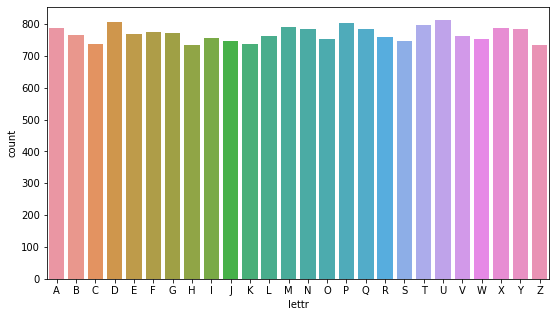

In [19]:
plt.figure(figsize=(9,5))
sns.countplot(x='lettr' ,data=df, order=letter)

In [20]:
## basic plot of letter with x-box (mean value of each letter in 'x-box')

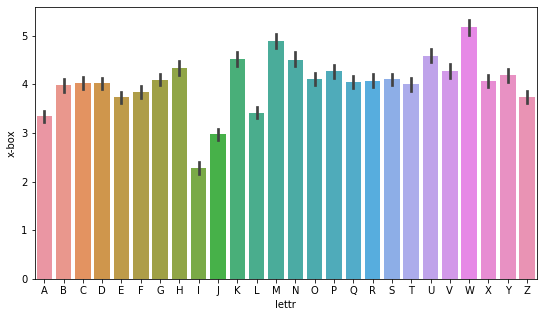

In [21]:
plt.figure(figsize=(9,5))
sns.barplot(x='lettr', y='x-box', data=df, order=letter)

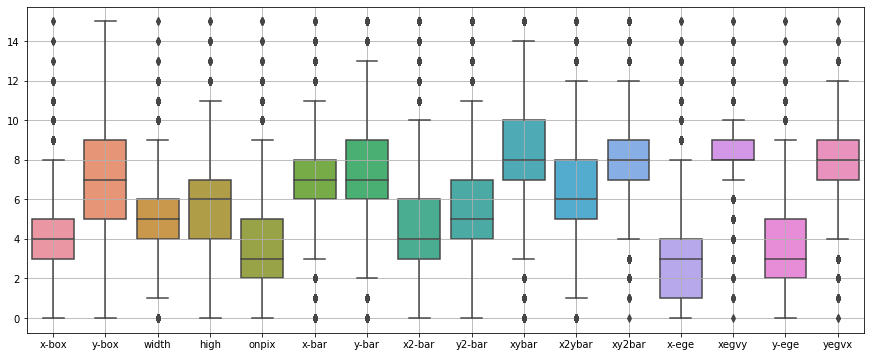

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.grid()

In [23]:
## seprate input and output features

In [24]:
x = df.iloc[:,1:].values
y = LabelEncoder().fit_transform(df.iloc[:,0])

In [25]:
## Standardize the features 

In [26]:
x = StandardScaler().fit(x).transform(x)

In [27]:
## run classifier with cross validation 

In [28]:
skf = StratifiedKFold(n_splits=10,)

In [29]:
knn = KNeighborsClassifier()
accuracy = []
for train_index, test_index in skf.split(x,y):
    train_x, test_x = x[train_index], x[test_index]
    train_y, test_y = y[train_index], y[test_index]
    knn.fit(train_x, train_y)
    accuracy.append(knn.score(test_x, test_y))
mean_accuracy =np.array(accuracy).mean()   
print('Average Accuracy Score : ', mean_accuracy*100)

Average Accuracy Score :  94.8198834368685


In [30]:
## Average accuracy range 

In [31]:
accuracy_range_lower = np.array(accuracy).mean()-np.array(accuracy).std()
accuracy_range_upper = np.array(accuracy).mean()+np.array(accuracy).std()
print('Accuracy lies between ', (accuracy_range_lower *100), ' to ', (accuracy_range_upper*100))

Accuracy lies between  94.28484077037015  to  95.35492610336684


In [32]:
## call train_test_split() for split the dataset into traning and testing  

In [33]:
train_x, test_x, train_y, test_y = train_test_split(x, y, train_size =0.8, random_state = 4)

In [34]:
## let's fit the model 

In [35]:
knn.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
## predict the values for test_x

In [37]:
y_pred = knn.predict(test_x)
y_pred[10:15]

array([ 5, 25, 15, 13, 12])

In [38]:
test_y[10:15]

array([ 5, 25, 15, 13, 12])

In [39]:
## confusion matrix

In [40]:
c_m = confusion_matrix(test_y, y_pred)

In [41]:
## visualize the confusion matrix

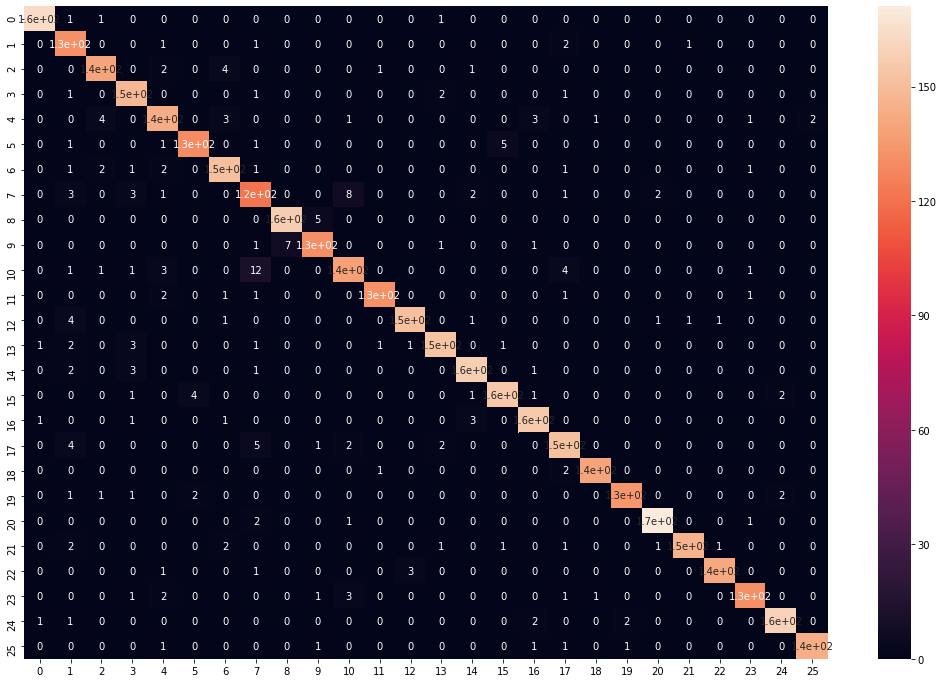

In [42]:
plt.figure(figsize=(18,12))
sns.heatmap(data=c_m, annot=True)

In [43]:
## check model score

In [44]:
knn.score(test_x, test_y)*100

94.5

In [45]:
## check percision and recall score

In [46]:
print('Percision Score : ', precision_score(test_y, y_pred, average='macro')*100)

Percision Score :  94.54830076887994


In [47]:
print('Recall Score : ', recall_score(test_y, y_pred, average='macro')*100)

Recall Score :  94.47638121983343


In [48]:
## calculate the prediction probability 

In [82]:
y_proba = knn.predict_proba(test_x)
y_proba[1:2]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ,
        0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. ]])

In [50]:
## check F-1 score

In [51]:
f1_score(test_y, y_pred, average='macro')

0.9448186222598811

In [52]:
## roc curve 

In [76]:
fpr, tpr, threshold = roc_curve(test_y, y_pred,  pos_label=25,)

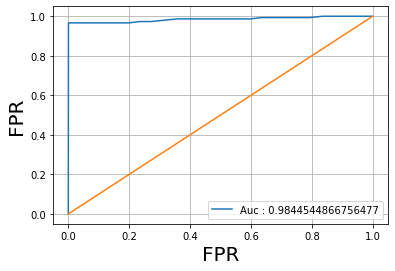

In [80]:
area = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Auc : {area}')
plt.plot([0,1], [0,1])
plt.xlabel('FPR', fontsize = 20)
plt.ylabel('FPR', fontsize = 20)
plt.grid()
plt.legend()